# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

data_file = pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
city_city = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


count = 0
set = 1


for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count > 48:
            count = count = 1
            set = set + 1
            city_city.append(city)
        else:
            count = count + 1
            city_city.append(city)
        print(f"Processing Record {count} of Set {set} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("Search Complete")

Processing Record 1 of Set 1 | sassandra
Processing Record 2 of Set 1 | mvuma
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | arraial do cabo
City not found. Skipping...
Processing Record 6 of Set 1 | umm lajj
City not found. Skipping...
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | bijar
Processing Record 11 of Set 1 | rikitea
City not found. Skipping...
Processing Record 12 of Set 1 | sri aman
Processing Record 13 of Set 1 | gamba
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | champerico
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | ucluelet
Processing Record 21 of Set 1 | old town
City not found. Skipping...
Processing Record 22 of Set 1 | j

City not found. Skipping...
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | clyde river
Processing Record 44 of Set 4 | roros
Processing Record 45 of Set 4 | bambous virieux
City not found. Skipping...
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | liverpool
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | carutapera
Processing Record 1 of Set 5 | moron
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | atasu
City not found. Skipping...
Processing Record 4 of Set 5 | nosy varika
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | pathein
Processing Record 7 of Set 5 | shuyskoye
Processing Record 8 of Set 5 | brewster
Processing Record 9 of Set 5 | malinovoye ozero
Processing Record 10 of Set 5 | ayagoz
Processing Record 11 of Set 5 | rio gallegos
City not found. Skipping...
Processing Reco

Processing Record 28 of Set 8 | baley
Processing Record 29 of Set 8 | oda
Processing Record 30 of Set 8 | alice springs
Processing Record 31 of Set 8 | maitum
Processing Record 32 of Set 8 | dustlik
Processing Record 33 of Set 8 | san ramon
City not found. Skipping...
Processing Record 34 of Set 8 | algarrobo
Processing Record 35 of Set 8 | pinega
Processing Record 36 of Set 8 | esperance
Processing Record 37 of Set 8 | zabid
Processing Record 38 of Set 8 | sergeyevka
Processing Record 39 of Set 8 | warri
Processing Record 40 of Set 8 | kysyl-syr
City not found. Skipping...
Processing Record 41 of Set 8 | matara
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | great yarmouth
Processing Record 44 of Set 8 | tadine
Processing Record 45 of Set 8 | floro
Processing Record 46 of Set 8 | karoi
Processing Record 47 of Set 8 | taltal
Processing Record 48 of Set 8 | zaraza
Processing Record 49 of Set 8 | gelemso
Processing Record 1 of Set 9 | doctor arroyo
Processing Re

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
theweather = {
    
    "City": city_city,
    "Cloudiness":cloudiness, 
    "Country":countries,
    "Date":dates, 
    "Humidity": humidities,
    "Lat":lats, 
    "Lng":lngs, 
    "Max Temp": max_temps,
    "Wind Speed":wind_speeds
    
}





In [9]:
theweather_dataframe = pd.DataFrame(theweather)

In [10]:
theweather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sassandra,31,CI,1569469565,99,4.95,-6.09,72.27,2.55
1,mvuma,53,ZW,1569469565,80,-19.28,30.53,40.84,17.09
2,ribeira grande,7,PT,1569469566,91,38.52,-28.70,72.52,14.65
3,ushuaia,20,AR,1569469566,69,-54.81,-68.31,41.00,17.22
4,arraial do cabo,100,BR,1569469458,88,-22.97,-42.02,67.84,22.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

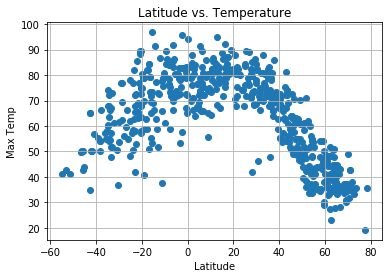

In [11]:
x_LTvalues = theweather_dataframe["Lat"]
y_LTvalues = theweather_dataframe["Max Temp"]
plt.scatter(x_LTvalues,y_LTvalues)
plt.grid()
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


plt.savefig("LatitudevsMax_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

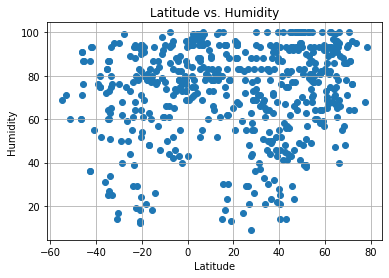

In [12]:
x_LHvalues = theweather_dataframe["Lat"]
y_LHvalues = theweather_dataframe["Humidity"]
plt.scatter(x_LHvalues,y_LHvalues)
plt.grid()
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("LatitudevsHumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

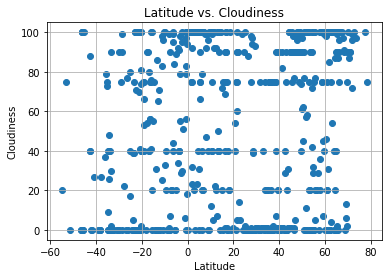

In [13]:
x_LCvalues = theweather_dataframe["Lat"]
y_LCvalues = theweather_dataframe["Cloudiness"]
plt.scatter(x_LCvalues, y_LCvalues)
plt.grid()
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("LatitudevsCloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

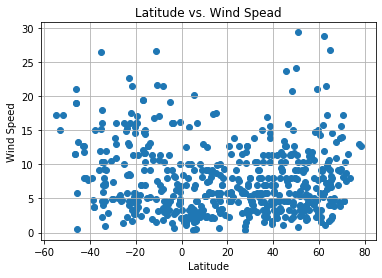

In [14]:
x_values = theweather_dataframe["Lat"]
y_values = theweather_dataframe["Wind Speed"]
plt.scatter(x_values, y_values)

plt.grid()
plt.title("Latitude vs. Wind Spead")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


plt.savefig("LatitudevsWind.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames

SouthernHem = theweather_dataframe[(theweather_dataframe['Lat'] < 0) ]

SouthernHem.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,mvuma,53,ZW,1569469565,80,-19.28,30.53,40.84,17.09
3,ushuaia,20,AR,1569469566,69,-54.81,-68.31,41.00,17.22
4,arraial do cabo,100,BR,1569469458,88,-22.97,-42.02,67.84,22.73
6,mahebourg,40,MU,1569469566,94,-20.41,57.70,75.00,3.36
8,mataura,100,NZ,1569469471,91,-46.19,168.86,50.00,18.99


In [16]:
NorthernHem = theweather_dataframe[(theweather_dataframe['Lat'] > 0) ]

NorthernHem.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sassandra,31,CI,1569469565,99,4.95,-6.09,72.27,2.55
2,ribeira grande,7,PT,1569469566,91,38.52,-28.70,72.52,14.65
5,umm lajj,2,SA,1569469566,72,25.02,37.27,83.52,10.33
7,geraldton,40,CA,1569469566,100,49.72,-86.95,46.40,8.05
9,bijar,0,IR,1569469567,44,35.87,47.60,48.02,1.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8426425246886043


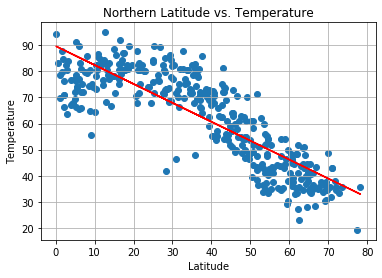

In [17]:
x_NLTvalues = NorthernHem["Lat"]
y_NLTvalues = NorthernHem["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_NLTvalues, y_NLTvalues)

NLT_regress_values = x_NLTvalues * slope + intercept


NLT_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_NLTvalues,y_NLTvalues)
plt.grid()
plt.title("Northern Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.plot(x_NLTvalues,NLT_regress_values,"r-")
plt.annotate(NLT_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Northern Max_Temp_Latitude_Linear.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.624252155864057


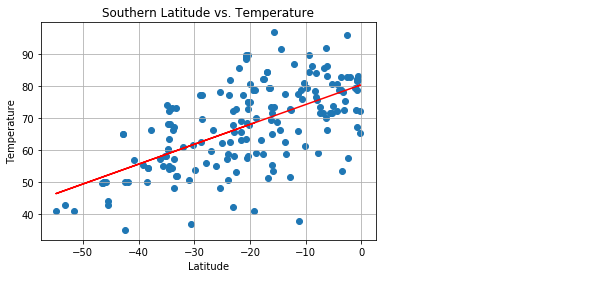

In [18]:
x_SLTvalues = SouthernHem["Lat"]
y_SLTvalues = SouthernHem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_SLTvalues, y_SLTvalues)

SLT_regress_values = x_SLTvalues * slope + intercept

SLT_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_SLTvalues,y_SLTvalues)
plt.grid()
plt.title("Southern Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.plot(x_SLTvalues,SLT_regress_values,"r-")
plt.annotate(SLT_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")


plt.savefig("Southern Max_Temp_Latitude_Linear.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027158777207097796


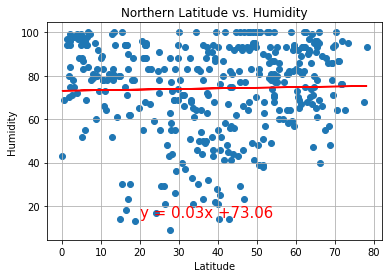

In [19]:
x_NLHvalues = NorthernHem["Lat"]
y_NLHvalues = NorthernHem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_NLHvalues, y_NLHvalues)

NLH_regress_values = x_NLHvalues * slope + intercept


NLH_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_NLHvalues,y_NLHvalues)
plt.grid()
plt.title("Northern Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_NLHvalues,NLH_regress_values,"r-")
plt.annotate(NLH_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Northern Humidity_Latitude_Linear.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12671585126563747


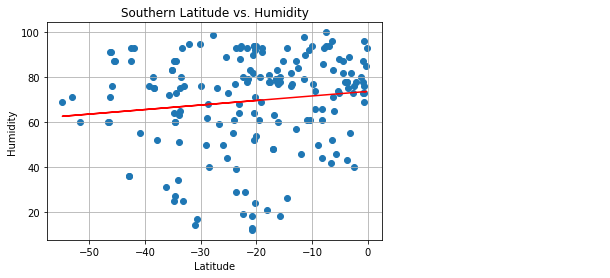

In [20]:
x_SLHvalues = SouthernHem["Lat"]
y_SLHvalues = SouthernHem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_SLHvalues, y_SLHvalues)

SLH_regress_values = x_SLHvalues * slope + intercept


SLH_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_SLHvalues,y_SLHvalues)
plt.grid()
plt.title("Southern Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_SLHvalues,SLH_regress_values,"r-")
plt.annotate(SLH_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Southern Humidity_Latitude_Linear.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06679447411482578


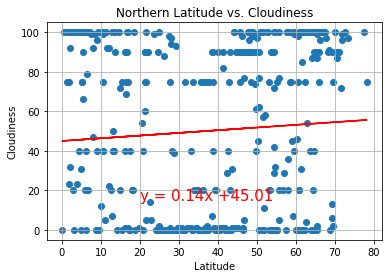

In [21]:
x_NLCvalues = NorthernHem["Lat"]
y_NLCvalues = NorthernHem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_NLCvalues, y_NLCvalues)

NLC_regress_values = x_NLCvalues * slope + intercept


NLC_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_NLCvalues,y_NLCvalues)
plt.grid()
plt.title("Northern Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_NLCvalues,NLC_regress_values,"r-")
plt.annotate(NLC_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Northern Cloudiness_Latitude_Linear.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24230589614489367


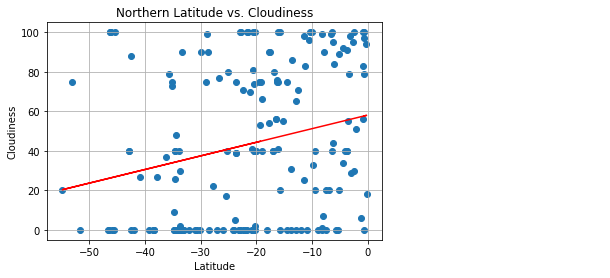

In [22]:
x_SLCvalues = SouthernHem["Lat"]
y_SLCvalues = SouthernHem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_SLCvalues, y_SLCvalues)

SLC_regress_values = x_SLCvalues * slope + intercept


SLC_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_SLCvalues,y_SLCvalues)
plt.grid()
plt.title("Northern Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_SLCvalues,SLC_regress_values,"r-")
plt.annotate(SLC_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Southern Cloudiness_Latitude_Linear.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21293715630158724


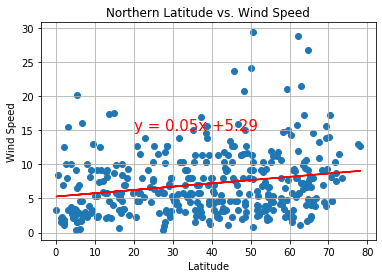

In [23]:
x_NLWvalues = NorthernHem["Lat"]
y_NLWvalues = NorthernHem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_NLWvalues, y_NLWvalues)

NLW_regress_values = x_NLWvalues * slope + intercept


NLW_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_NLWvalues,y_NLWvalues)
plt.grid()
plt.title("Northern Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_NLWvalues,NLW_regress_values,"r-")
plt.annotate(NLW_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Northern WindSpeed_Latitude_Linear.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19261084004662365


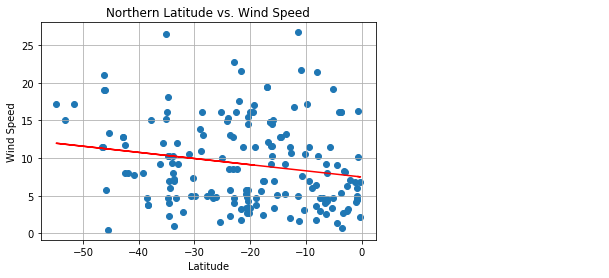

In [24]:
x_SLWvalues = SouthernHem["Lat"]
y_SLWvalues = SouthernHem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_SLWvalues, y_SLWvalues)

SLW_regress_values = x_SLWvalues * slope + intercept


SLW_line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))


plt.scatter(x_SLWvalues,y_SLWvalues)
plt.grid()
plt.title("Northern Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_SLWvalues,SLW_regress_values,"r-")
plt.annotate(SLW_line_eq,(20,15),fontsize=15,color="red")




print(f"The r-squared is: {rvalue}")

plt.savefig("Southern WindSpeed_Latitude_Linear.png")

plt.show()